<a href="https://colab.research.google.com/github/jkeza1/Group7_water-quality-model/blob/NICOLAS/NICOLAS_Copy_Of_Formative_II_Starter_Code_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Excercise - Creating our own custom Model

This is a notebook that provides a quick overview of how to create your own custom model. You will be creating a simple model.
You will be utilizing Keras and Tensorflow


## Water Quality Dataset

This dataset contains water quality measurements and assessments related to potability, which is the suitability of water for human consumption. The dataset's primary objective is to provide insights into water quality parameters and assist in determining whether the water is potable or not. Each row in the dataset represents a water sample with specific attributes, and the "Potability" column indicates whether the water is suitable for consumption.

https://www.kaggle.com/datasets/uom190346a/water-quality-and-potability?select=water_potability.csv


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Nadam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving water_potability.csv to water_potability.csv


In [ ]:
#LOAD THE DATA
import pandas as pd
data = pd.read_csv('water_potability.csv')
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [ ]:
# --- Data Preprocessing ---
data = data.interpolate(inplace=False).bfill().ffill()

X = data.drop('Potability', axis=1)
y = data['Potability']

In [ ]:
class_counts = data['Potability'].value_counts()
print("Class distribution:")
print(class_counts)

Class distribution:
Potability
0    1998
1    1278
Name: count, dtype: int64


In [ ]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [ ]:
y_train.unique()

array([0, 1])

# Each Memeber Defines their model Here

In [ ]:
#Model Definition by member 5 (NICOLAS)
def my_water_quality_model():
    model = Sequential([
        Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.002), input_shape=(X_train.shape[1],)),
        Dropout(0.5),
        Dense(32, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid'),
    ])
    return model

# Start the training Process

In [ ]:
model = my_water_quality_model()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
optimizer = Nadam(learning_rate=0.001)

In [ ]:
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=6, min_delta=0.002, restore_best_weights=True)

In [ ]:
history = model.fit(
    X_train, y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_val, y_val),
    callbacks=[early_stop]
)

Epoch 1/1000
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.5839 - loss: 0.7465 - val_accuracy: 0.6232 - val_loss: 0.7023
Epoch 2/1000
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5563 - loss: 0.7482 - val_accuracy: 0.6273 - val_loss: 0.6986
Epoch 3/1000
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5831 - loss: 0.7211 - val_accuracy: 0.6354 - val_loss: 0.6923
Epoch 4/1000
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5758 - loss: 0.7234 - val_accuracy: 0.6436 - val_loss: 0.6888
Epoch 5/1000
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5721 - loss: 0.7251 - val_accuracy: 0.6395 - val_loss: 0.6859
Epoch 6/1000
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5895 - loss: 0.7095 - val_accuracy: 0.6375 - val_loss: 0.6825
Epoch 7/1000
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5865 - loss: 0.7108 - val_accuracy: 0.6375 - val_loss: 0.6812
Epoch 8/1000
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5849 - loss: 0.7042 - val_accuracy

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7118 - loss: 0.5949 
Test Loss: 0.5985, Test Accuracy: 0.7195


In [ ]:
y_pred = model.predict(X_test)
threshold = 0.5
y_pred_binary = (y_pred > threshold).astype(int)

cm = confusion_matrix(y_test, y_pred_binary)
report = classification_report(y_test, y_pred_binary)
print(report)

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
              precision    recall  f1-score   support

           0       0.71      0.92      0.80       307
           1       0.75      0.38      0.51       185

    accuracy                           0.72       492
   macro avg       0.73      0.65      0.66       492
weighted avg       0.73      0.72      0.69       492



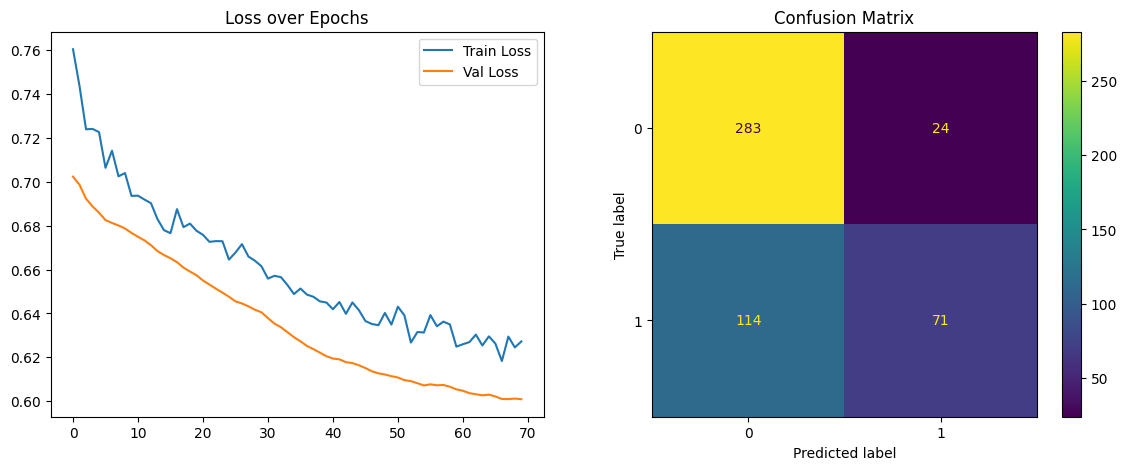

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(14, 5))
axs[0].plot(history.history['loss'], label='Train Loss')
axs[0].plot(history.history['val_loss'], label='Val Loss')
axs[0].set_title('Loss over Epochs')
axs[0].legend()

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(ax=axs[1])
axs[1].set_title('Confusion Matrix')

plt.show()

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,262 (32.28 KB)

 Trainable params: 2,753 (10.75 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,509 (21.52 KB)